In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
px = img[100,100]
print( px )
# accessing only blue pixel
blue = img[100,100,0]
print( blue )

#You can modify the pixel values the same way.

img[100,100] = [255,255,255]
print( img[100,100] )


[157 166 200]
157
[255 255 255]


El método anterior se utiliza normalmente para seleccionar una región de una matriz, digamos las primeras 5 filas y las últimas 3 columnas. Para el acceso a píxeles individuales, los métodos de matriz Numpy, array.item() y array.itemset() se consideran mejores. Sin embargo, siempre devuelven un escalar, por lo que si desea acceder a todos los valores B,G,R, deberá llamar a array.item() por separado para cada valor.

In [2]:
# accessing RED value
img.item(10,10,2)
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

Accessing Image Properties

In [3]:
print( img.shape )

(342, 548, 3)


Total number of pixels is accessed by img.size:

In [4]:
print( img.size )

562248


Image datatype is obtained by `img.dtype`:

In [5]:
print( img.dtype )

uint8


Image ROI

In [6]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

Splitting and Merging Image Channels

In [7]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

or

In [8]:
b = img[:,:,0]

Supongamos que desea establecer todos los píxeles rojos en cero; no es necesario dividir los canales primero. La indexación numpy es más rápida:

In [9]:
img[:,:,2] = 0

Making Borders for Images (Padding)

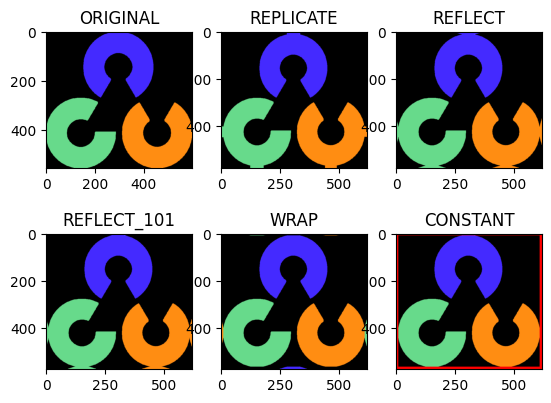

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('resources/opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()